In [25]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zawar_functions import * 

In [155]:
from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [133]:
df=pd.read_csv('clean_df.csv')
df['countries']=df['countries'].apply(lambda x: ast.literal_eval(x))
df['genre_names']=df['genre_names'].apply(lambda x: ast.literal_eval(x))

In [39]:
#df['original_language']=df['original_language'].map(language_dict)


In [134]:
#Make a dataframe with all genres as columns where 1 and 0 mean True or False
genre_df=df['genre_names'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')

C:\Users\Drago\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [55]:
genre_df.to_csv('genre_info',index=False)

In [145]:
#Merge the genre dataframe with the original to add in columns for each genre
#df2=pd.merge(df,genre_df,left_index=True,right_index=True)
#df2.head()

In [92]:
# Add profit, profit margin columns
# df2['profit'] = df2['revenue'] - df2['budget']
# df2['profit_margin'] = 100 * df2['profit'] / df2['revenue']
# df2['profit_margin'] = round(df2['profit_margin'], 1)

In [135]:
df.columns

Index(['id', 'imdb_id', 'budget', 'revenue', 'genre_names', 'original_title',
       'runtime', 'status', 'countries', 'title', 'original_language',
       'avg_vote', 'vote_count', 'popularity', 'genres', 'year', '90s', '00s',
       '10s', 'Drama', 'Thriller', 'Romance', 'Adventure', 'Action', 'History',
       'Comedy', 'Mystery', 'Fantasy', 'Animation', 'Family', 'Crime', 'War',
       'Science Fiction', 'Horror', 'Music', 'Western', 'TV Movie', 'profit',
       'profit_margin'],
      dtype='object')

In [149]:
#Get counts for each genre
genre_counts=genre_df.sum().to_frame(name='count').sort_values(by='count',ascending=False)
genre_counts_dict=genre_counts['count'].to_dict()


In [81]:
#List of all genres
genre_list=list(genre_df.columns)
#Dict to hold genre info
genre_info={}
for genre in genre_list:
    genre_info[genre]={}

In [159]:
#Function to add avgs for different categories
def get_genre_avg(category):
    for genre in genre_list:
        genre_info[genre]['avg_{}'.format(category)]=round((df[category]*df[genre]).sum()/genre_counts_dict[genre],2)

In [142]:
# Adding avgs for profit,profit_margin and revenue 
get_genre_avg('profit')
get_genre_avg('profit_margin')
get_genre_avg('revenue')

In [161]:
# Function to collect decade info about genres
def decade_genre_avg(category,decade):
    test_df=df[df[decade]==1]
    for genre in genre_list:
        genre_info[genre]['{}_avg_{}'.format(decade,category)]=round((test_df[category]*test_df[genre]).sum()/test_df[genre].sum(),2)

In [189]:
# Get 90s avg info by genre
decade_genre_avg('avg_vote','90s')
decade_genre_avg('profit','90s')
decade_genre_avg('revenue','90s')
decade_genre_avg('budget','90s')

# Get 2000s avg info by genre
decade_genre_avg('avg_vote','00s')
decade_genre_avg('profit','00s')
decade_genre_avg('revenue','00s')
decade_genre_avg('budget','00s')

# Get 2010s avg info by genre
decade_genre_avg('avg_vote','10s')
decade_genre_avg('profit','10s')
decade_genre_avg('revenue','10s')
decade_genre_avg('budget','10s')



C:\Users\Drago\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [190]:
# Making a df for all the genre analysis data from the genre dictionary
genre_df2=pd.DataFrame.from_dict(genre_info,orient='index')
genre_df2.rename(columns={
    '90s_avg_avg_vote': '90s_avg_rating',
    '00s_avg_avg_vote': '00s_avg_rating',
    '10s_avg_avg_vote': '10s_avg_rating'
                         }, inplace=True)
# Removing Westerns and the 1 TV Movie due to incomplete data
genre_df2.drop(['Western','TV Movie'],inplace=True)
#genre_df2.tail()

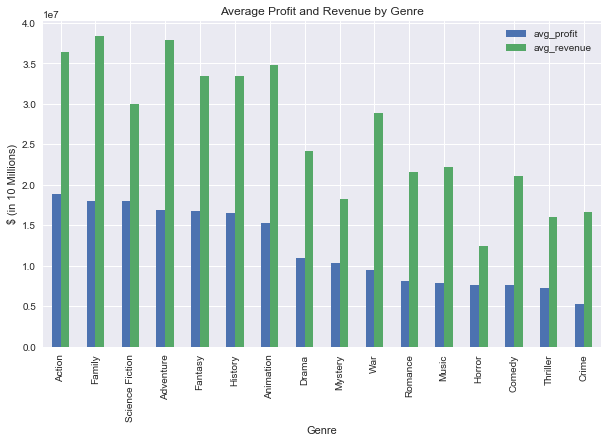

In [203]:
# Graph for Avg Profit and Revenue by Genre
genre_df2[['avg_profit','avg_revenue']].sort_values(by='avg_profit',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Profit and Revenue by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
#plt.show()
plt.savefig('./graphs/Avg_ProfRev_Genre.png', dpi=300, bbox_inches='tight')

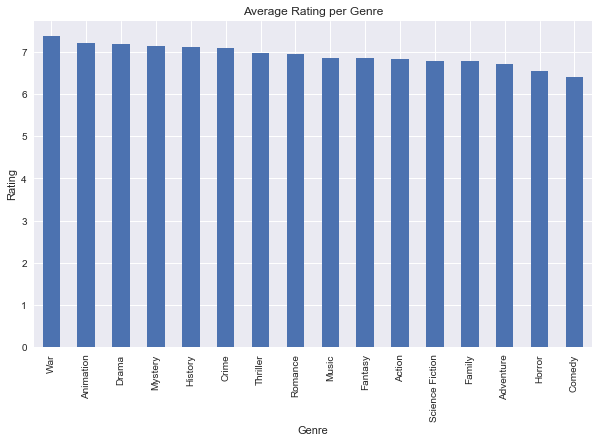

In [181]:
# Graph for Average Rating per Genre
genre_df2['avg_rating'].sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Rating per Genre')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.show()

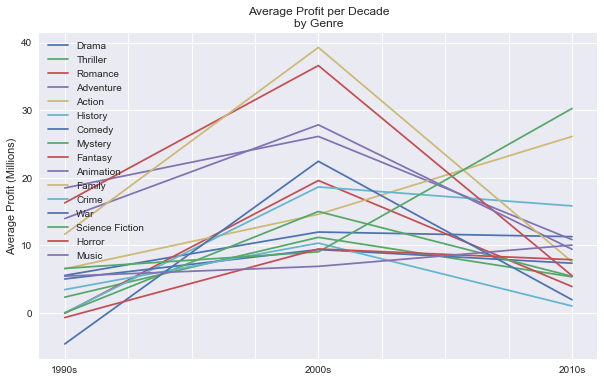

In [185]:
# Graph decade info for genre profit and revenue
plots={}
for genre in genre_list:
    plots[genre] = [genre_info[genre]['90s_avg_profit']/1000000,
                       genre_info[genre]['00s_avg_profit']/1000000,
                       genre_info[genre]['10s_avg_profit']/1000000]
plots=pd.DataFrame(plots, index=['1990s', '2000s', '2010s'])
plots.drop(['Western','TV Movie'],axis=1, inplace=True)
plots.plot(figsize=(10,6))
plt.title('Average Profit per Decade\nby Genre')
plt.ylabel('Average Profit (Millions)')
plt.show()

In [184]:
plots.drop(['Western','TV Movie'],axis=1)

,Drama,Thriller,Romance,Adventure,Action,History,Comedy,Mystery,Fantasy,Animation,Family,Crime,War,Science Fiction,Horror,Music
1990s,5.540992,2.324112,-0.070476,18.491135,6.521345,0.000000,5.019788,0.000000,16.287313,13.969519,11.633689,3.441524,-4.609639,6.578840,-0.698145,5.435903
2000s,11.967678,11.182597,19.597174,26.128066,14.589495,18.644960,9.372591,15.009611,36.623890,27.845169,39.301498,10.327203,22.448925,9.034860,9.457413,6.885317
2010s,11.280588,5.330479,3.896389,10.843550,26.118426,15.835001,7.351866,5.409540,5.498635,9.417496,7.558149,1.012770,1.938267,30.262358,7.870763,10.037612


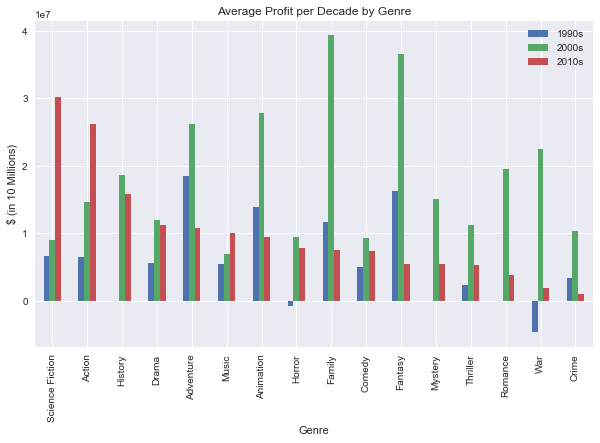

In [201]:
genre_df2[['90s_avg_profit','00s_avg_profit','10s_avg_profit']].sort_values(by='10s_avg_profit',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Profit per Decade by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
plt.legend(labels=['1990s', '2000s', '2010s'])
#plt.show()
plt.savefig('./graphs/Avg_Profit.png', dpi=300, bbox_inches='tight')

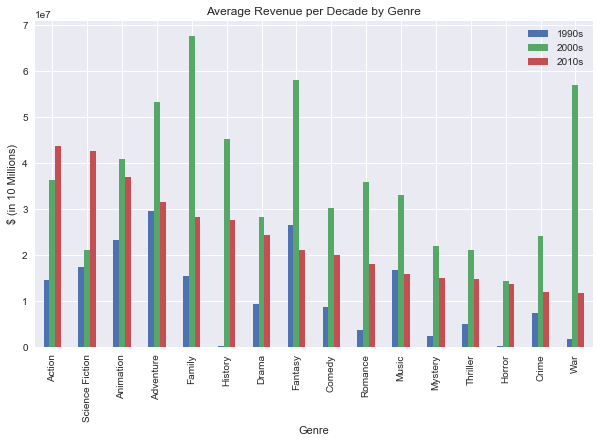

In [200]:
genre_df2[['90s_avg_revenue','00s_avg_revenue','10s_avg_revenue']].sort_values(by='10s_avg_revenue',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Revenue per Decade by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
plt.legend(labels=['1990s', '2000s', '2010s'])
#plt.show()
plt.savefig('./graphs/Avg_Revenue.png', dpi=300, bbox_inches='tight')

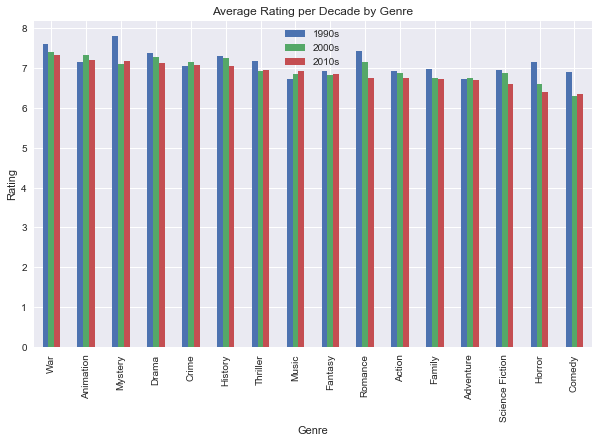

In [199]:
genre_df2[['90s_avg_rating','00s_avg_rating','10s_avg_rating']].sort_values(by='10s_avg_rating',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Rating per Decade by Genre')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.legend(labels=['1990s', '2000s', '2010s'])
#plt.show()
plt.savefig('./graphs/Avg_Rating.png', dpi=300, bbox_inches='tight')

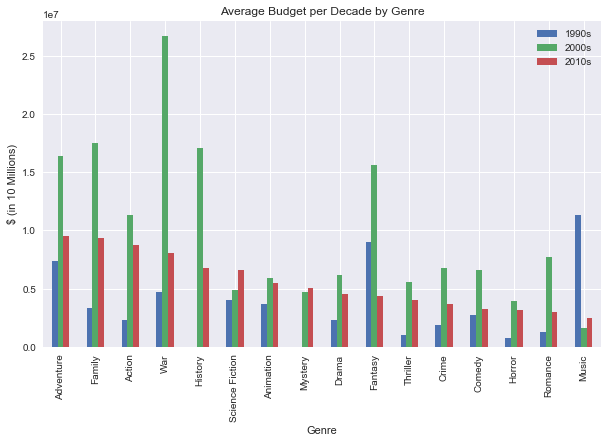

In [198]:
genre_df2[['90s_avg_budget','00s_avg_budget','10s_avg_budget']].sort_values(by='10s_avg_budget',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Budget per Decade by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
plt.legend(labels=['1990s', '2000s', '2010s'])
#plt.show()
plt.savefig('./graphs/Avg_Budget.png', dpi=300, bbox_inches='tight')

In [59]:
#df2.to_csv('clean_df.csv',index=False)